# YOLO model

A fast object detection model (find bounding boxes in images / video feeds with real-time fps performance).

Git repo: https://github.com/thtrieu/darkflow

Important: **set the runtime to GPU**

Note: this one will need a small edits of the codes - just open them in the colab (in the left "Files" section) and save on the virtual machine we are using ... on your pc's you would edit the file in some other text editor. 


## 0.) Setup

In [1]:
%tensorflow_version 1.x

!git clone https://github.com/thtrieu/darkflow.git
%cd darkflow

TensorFlow 1.x selected.
Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 32.98 MiB | 43.74 MiB/s, done.
Resolving deltas: 100% (1762/1762), done.
/content/darkflow


In [3]:
# Need to edit a file: let's modify the line self.offset = 16 in the ./darkflow/utils/loader.py file and replace with self.offset = 20.
!cat darkflow/utils/loader.py | grep "self.offset"
# edit it so that you see this: "self.offset = 20"

            #self.offset = 16
            self.offset = 20
        end_point = self.offset + 4 * size
            offset = self.offset,
        self.offset = end_point


In [4]:
# Need to also edit the labels.txt file!
!cat labels.txt
# so that it doesn't have these basic four classes, but everything from the next code block (80 lines)

aeroplane
bicycle
bird
boat

In [ ]:
person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush

In [5]:
# like so:
!cat labels.txt

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush

In [7]:
!pip install .

Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=816620 sha256=3536fbcf48255332f2d3751525b973f12bf7118a142b46ebbcbe798638bd5273
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6i6c3h_/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow


Now we need to download the YOLO model weights and cook them into these files: "built_graph/yolo.meta" and "built_graph/yolo.pb" (see https://github.com/thtrieu/darkflow#save-the-built-graph-to-a-protobuf-file-pb for details).




In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2-tiny.cfg
!wget https://pjreddie.com/media/files/yolov2-tiny.weights
!mv yolov2-tiny.weights bin/yolov2-tiny.weights
!mv yolov2-tiny.cfg cfg/

In [9]:
!cat cfg/yolov2-tiny.cfg | grep "classes"

classes=80


In [14]:
!flow --model cfg/yolov2-tiny.cfg --load bin/yolov2-tiny.weights --savepb

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.










Parsing ./cfg/yolov2-tiny.cfg
Parsing cfg/yolov2-tiny.cfg
Loading bin/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.003786802291870117s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | max

In [15]:
!ls built_graph

yolov2-tiny.meta  yolov2-tiny.pb


In [16]:
%cd ..

/content


## 1.) Using YOLO in code and in command line

In [17]:
!flow --h

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.










Example usage: flow --imgdir sample_img/ --model cfg/yolo.cfg --load bin/yolo.weights

Arguments:
  --help, --h, -h  show this super helpful message and exit
  --imgdir         path to testing directory with images
  --binary         path to .weights directory
  --config         path to .cfg directory
  --dataset        path to dataset directory
  --labels         path to labels file
  --backup         path to backup folder
  --summary        path to TensorBoard summaries directory
  --annotation     path to annotation directory
  --threshold      detection threshold
  --model          configuration of choice
  --traine

In [18]:
!ls darkflow/sample_img

out		     sample_eagle.jpg	 sample_office.jpg
sample_computer.jpg  sample_giraffe.jpg  sample_person.jpg
sample_dog.jpg	     sample_horses.jpg	 sample_scream.jpg


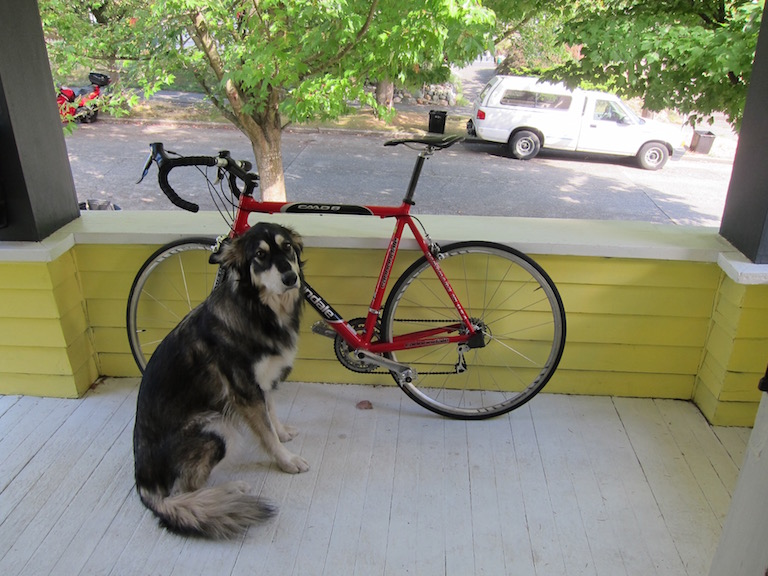

In [42]:
from IPython.display import Image
Image("darkflow/sample_img/sample_dog.jpg", width=800)

In [32]:
# Using CPU and the original weights = slower

from darkflow.net.build import TFNet
import cv2
from timeit import default_timer as timer


options = {"model": "darkflow/cfg/yolov2-tiny.cfg", "load": "darkflow/bin/yolov2-tiny.weights", "threshold": 0.3, "labels": "darkflow/labels.txt"}

tfnet = TFNet(options)

imgcv = cv2.imread("darkflow/sample_img/sample_dog.jpg")
_ = tfnet.return_predict(imgcv) # warm it up

start = timer()
result = tfnet.return_predict(imgcv)
end = timer()
print("Took",(end - start),"sec!") # Took 0.17151034600010462 sec!

print(result)

/usr/local/lib/python3.6/dist-packages/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2-tiny.cfg not found, use darkflow/cfg/yolov2-tiny.cfg instead
  cfg_path, FLAGS.model))


Parsing darkflow/cfg/yolov2-tiny.cfg
Loading darkflow/bin/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.009103059768676758s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26,

In [33]:
# Using GPU and the cooked weights = faster!

from darkflow.net.build import TFNet
import cv2

options = {"pbLoad": "darkflow/built_graph/yolov2-tiny.pb",
           "metaLoad": "darkflow/built_graph/yolov2-tiny.meta",
           "labels": "darkflow/labels.txt",
           "threshold": 0.3,
           "gpu": 0.8}
               
model = TFNet(options)

image_path = "darkflow/sample_img/sample_dog.jpg"
image_object = cv2.imread(image_path)

_ = model.return_predict(image_object)  # warm it up

start = timer()
result = model.return_predict(image_object)
end = timer()
print("Took",(end - start),"sec!") # Took 0.010601593000046705 sec!

print(result)



Loading from .pb and .meta
GPU mode with 0.8 usage
Took 0.010601593000046705 sec!
[{'label': 'person', 'confidence': 0.3880236, 'topleft': {'x': 66, 'y': 65}, 'bottomright': {'x': 96, 'y': 94}}, {'label': 'motorbike', 'confidence': 0.4326866, 'topleft': {'x': 63, 'y': 78}, 'bottomright': {'x': 100, 'y': 120}}, {'label': 'bicycle', 'confidence': 0.83482057, 'topleft': {'x': 46, 'y': 92}, 'bottomright': {'x': 595, 'y': 482}}, {'label': 'car', 'confidence': 0.6786816, 'topleft': {'x': 455, 'y': 85}, 'bottomright': {'x': 667, 'y': 165}}, {'label': 'dog', 'confidence': 0.49140972, 'topleft': {'x': 127, 'y': 211}, 'bottomright': {'x': 389, 'y': 533}}]


In [39]:
!flow --imgdir darkflow/sample_img/ --pbLoad darkflow/built_graph/yolov2-tiny.pb --metaLoad darkflow/built_graph/yolov2-tiny.meta --labels darkflow/labels.txt --threshold 0.3 --gpu 0.8

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











Loading from .pb and .meta
Instructions for updating:
Use tf.gfile.GFile.


GPU mode with 0.8 usage



2020-07-12 13:40:40.777265: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-07-12 13:40:40.777639: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2974d80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-12 13:40:40.777679: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-12 13:40:40.779518: I tensorflow/stream_executor/platform/default/dso_loader.cc:44]

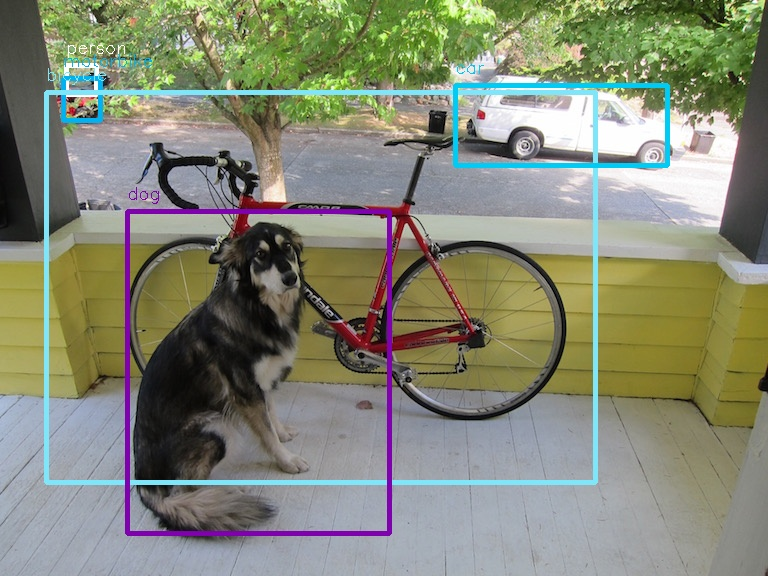

In [41]:
from IPython.display import Image
Image("darkflow/sample_img/out/sample_dog.jpg", width=800)